#### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Credit Card Fraud Detection</div></b>

This project aims to develop an efficient, scalable, and accurate machine-learning model capable of identifying and preventing fraudulent credit card transactions in real time. By leveraging advanced data processing techniques and classification algorithms, the goal is to minimize financial losses for institutions and protect consumers from fraudulent activities. This solution is designed to enhance the decision-making processes of financial entities, ensuring the early detection of fraud while maintaining operational efficiency and compliance with industry regulations.

#### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Imbalance
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Import Dataset

data = pd.read_csv(r"C:\Users\Harrison\Downloads\fraud detection\data\creditcard.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data Inspection

In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# Check missing values

data.isnull().any().sum()

0

In [7]:
# checl for duplicates

data.duplicated().sum()

1081

In [8]:
# drop duplicates

data = data.drop_duplicates()

In [9]:
# verify 

data.duplicated().sum()

0

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


#### Data Preprocessing

In [11]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

We can see that the data is highly imbalanced

492 transactions are fraud

284315 transactions are not fraud

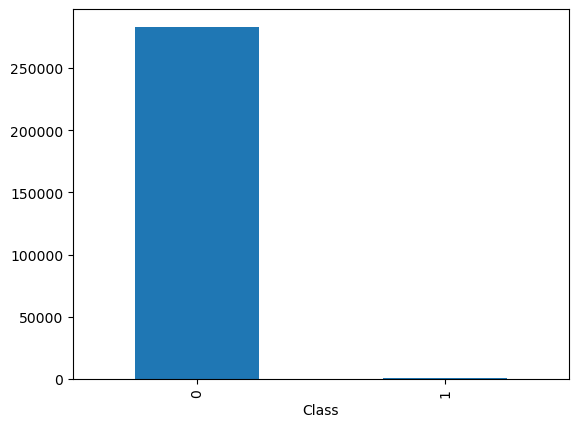

In [12]:
# Visualize

data['Class'].value_counts().plot(kind='bar')
plt.show()

In [13]:
# Percentage of class

print('Non-Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Non-Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


This is a highly Imbalanced Dataset

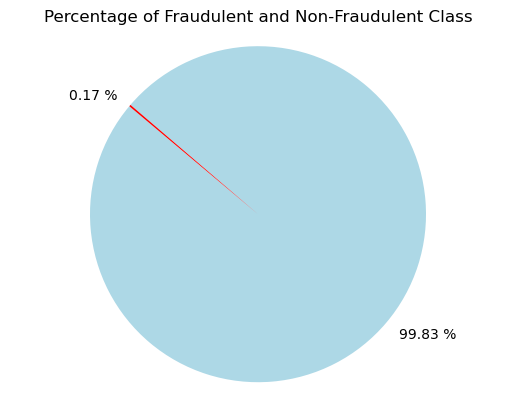

In [14]:
plt.pie(data['Class'].value_counts(), 
        labels= [f"{round(data['Class'].value_counts()[0]/len(data)*100,2)} %" ,
                 f"{round(data['Class'].value_counts()[1]/len(data)*100,2)} %" ],
        colors=['lightblue','red'],
       startangle=140)
plt.axis('equal')        
plt.title("Percentage of Fraudulent and Non-Fraudulent Class")    
plt.show()   

As we can see, there is a high class imbalance in the data, so we will apply over or under sampling technique.

In [15]:
fraud = data[data.Class == 1]
non_fraud = data[data.Class == 0]

In [16]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [17]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
non_fraud.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

#### Model Building

In [19]:
# Instantiate the dependent & independent variables
X = data.drop('Class', axis=1)  # Drop the target 'Class' from the features
y = data['Class']  # Define the target 'Class'

# Split the data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the 'Amount' column (and any other features if necessary)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# It's important to fit the scaler on the training data and then transform both training and test sets
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

# Apply sampling technique SMOTE (on the training set only)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Resample only the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [20]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(396554, 30)
(396554,)


In [21]:
lr_model = LogisticRegression()

# Fit the Model
lr_model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [22]:
# Make predictions on the test data

y_pred = lr_model.predict(X_test)

In [23]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Make predictions on the test data (use predict_proba for ROC AUC)
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, lr_model.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, lr_model.predict(X_test)))

# Calculate ROC AUC score using the predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9815785145327662
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.07      0.88      0.14       142

    accuracy                           0.98     85118
   macro avg       0.54      0.93      0.56     85118
weighted avg       1.00      0.98      0.99     85118

ROC AUC Score: 0.9662744045709011


- #### Calculate Precision-Recall AUC

In [24]:
from sklearn.metrics import precision_recall_curve, auc

# Get the predicted probabilities for the positive class (class 1)
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate the Precision-Recall AUC
pr_auc = auc(recall, precision)

# Print the Precision-Recall AUC
print(f"Precision-Recall AUC: {pr_auc:.4f}")


Precision-Recall AUC: 0.7323


- #### Random Forests with Balanced Class Weights

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Initialize the Random Forest Classifier with balanced class weights (optional)
rfc_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fit the model on the SMOTE resampled training data
rfc_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test data
rfc_y_pred = rfc_model.predict(X_test)

# Make predictions on the test data (use predict_proba for ROC AUC)
y_pred_prob = rfc_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Evaluate the model's accuracy and classification report
print("Accuracy:", accuracy_score(y_test, rfc_y_pred))
print("Classification Report:\n", classification_report(y_test, rfc_y_pred))

# Calculate the ROC AUC score using the predicted probabilities
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9994830705608685
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.80      0.84       142

    accuracy                           1.00     85118
   macro avg       0.94      0.90      0.92     85118
weighted avg       1.00      1.00      1.00     85118

ROC AUC Score: 0.9546380204120599


- #### XGBoost with Class Imbalance Handling

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier

# Train an XGBClassifier with class imbalance handling
clf_xgb = XGBClassifier(scale_pos_weight=1, random_state=42)
clf_xgb.fit(X_train_smote, y_train_smote)

# Make predictions and evaluate
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_proba_xgb = clf_xgb.predict_proba(X_test)[:, 1]

# Evaluate the model
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost - ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))


XGBoost - Accuracy: 0.9994713221645245
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.88      0.79      0.83       142

    accuracy                           1.00     85118
   macro avg       0.94      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118

XGBoost - ROC AUC Score: 0.9653423269801448


**Model Evaluation**:
   - **Accuracy**: 0.9994 (approximately 99.94%), indicating that the model correctly classified nearly all instances in the test set.
   - **Classification Report**: 
     - **Precision**: 1.00 for the majority class and 0.88 for the minority class.
     - **Recall**: 1.00 for the majority class and 0.79 for the minority class.
     - **F1-Score**: 1.00 for the majority class and 0.83 for the minority class.

   
**ROC AUC Score**: 0.9653, which indicates a strong ability of the model to distinguish between classes. A score close to 1 suggests excellent performance.

#### Summary:
The XGBoost model performs exceptionally well, with high accuracy, precision, recall, and F1-scores, especially for the majority class. However, the minority class shows slightly lower metrics, which is common in imbalanced datasets. The ROC AUC score further reinforces the model's effectiveness in distinguishing between the two classes. Overall, the results suggest that the XGBoost model is suitable for this classification problem, particularly in handling class imbalance.

- #### Calculate Precision-Recall AUC

In [27]:
# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)

# Calculate the Precision-Recall AUC
pr_auc = auc(recall, precision)

# Print the Precision-Recall AUC
print(f"Precision-Recall AUC: {pr_auc:.4f}")

Precision-Recall AUC: 0.8126
